In [5]:
import os
import sys
sys.path.append(os.path.relpath('code' ))
from analysis_helper_functions import *
import numpy as np

base_folder_dir = 'data_weak_control'
folder_names = os.listdir('data_weak_control')
dict_of_folders_with_files = dict()
for x in folder_names:
    if x != '.DS_Store':
        dict_of_folders_with_files[x] = create_dict_for_folder(base_folder_dir+'/' +x)


#Structure of data dict:
    # data_dict["folder_name"]=[ {"file_name":data}, [alpha,beta,gamma,h] ]
data_dict = dict()
for x in dict_of_folders_with_files.keys():
    for y in dict_of_folders_with_files[x].keys():
        filename = base_folder_dir+"/"+x + "/"+y
        with open(filename, 'rb') as files:
            data_dict[y] = [pickle.load(files) ,dict_of_folders_with_files[x][y]]

In [7]:
data_dict['new_u_dep_data_a=1.0g=1.0h=0.4.pkl'][0].keys()

dict_keys(['parameters', 'y_d_sol', 'p_y_d_sol', 'v_y_d_sol', 'mu_sol', 'nu_sol', 'v_standard_sol', 'q_standard_sol', 'ocp_result', 'u_node_d_sol', 'H_control_sol', 'standard_Ua', 'standard_Ub', 'conserved_I'])

In [8]:
def get_fig_data_from_dict(datadict):
    times = datadict["parameters"]["times"]
    y_d,v_y_d,p_y_d,u_d = datadict["y_d_sol"],datadict["v_y_d_sol"],datadict["p_y_d_sol"],datadict["u_node_d_sol"]
    mu,nu = datadict["mu_sol"],datadict["nu_sol"]
    H_evo = datadict["H_control_sol"]
    standard_q,standard_v = datadict["q_standard_sol"],datadict["v_standard_sol"]
    standard_Ua, standard_Ub = datadict["standard_Ua"], datadict["standard_Ub"]
    conserved_I = p_y_d.transpose()[0,0]
    conserved_I = conserved_I.flatten()# = datadict["conserved_I"] # once it is stored remove this temporary fix
    return {"times":times,"y_d": y_d.transpose(), "v_y_d":v_y_d.transpose(), "p_y_d": p_y_d.transpose(), "u_d":u_d,"standard_U_a":standard_Ua,"standard_U_b":standard_Ub, "mu":mu,"nu":nu,"H_evo":H_evo.flatten(),"conserved_I":conserved_I,"standard_q":standard_q.transpose(),"standard_v":standard_v.transpose()}

In [9]:
get_fig_data_from_dict(data_dict['new_u_dep_data_a=1.0g=1.0h=0.4.pkl'][0])["standard_v"]

array([[ 9.78809723e-18,  7.68431720e-03,  1.45400336e-02,
         2.06346046e-02,  2.64694593e-02,  3.24784921e-02,
         3.85977522e-02,  4.43329129e-02,  4.92534809e-02,
         5.34196875e-02,  5.73188836e-02,  6.13785660e-02,
         6.55424144e-02,  6.93297881e-02,  7.23159413e-02,
         7.45530966e-02,  7.65152689e-02,  7.86249203e-02,
         8.08340501e-02,  8.26750159e-02,  8.37273958e-02,
         8.40347795e-02,  8.40585550e-02,  8.42175521e-02,
         8.44727203e-02,  8.43686596e-02,  8.34878587e-02,
         8.18646817e-02,  7.99486785e-02,  7.81564637e-02,
         7.64584868e-02,  7.44107480e-02,  7.15973005e-02,
         6.80427098e-02,  6.41855955e-02,  6.04416907e-02,
         5.67914508e-02,  5.28013717e-02,  4.80557030e-02,
         4.25687693e-02,  3.67692086e-02],
       [ 6.65031740e-18, -4.59526498e-03, -4.38174346e-03,
         3.99820251e-04,  4.96143569e-03,  4.76185919e-03,
         2.66807854e-05, -4.50380398e-03, -4.31972248e-03,
         3.70

# New figure idea

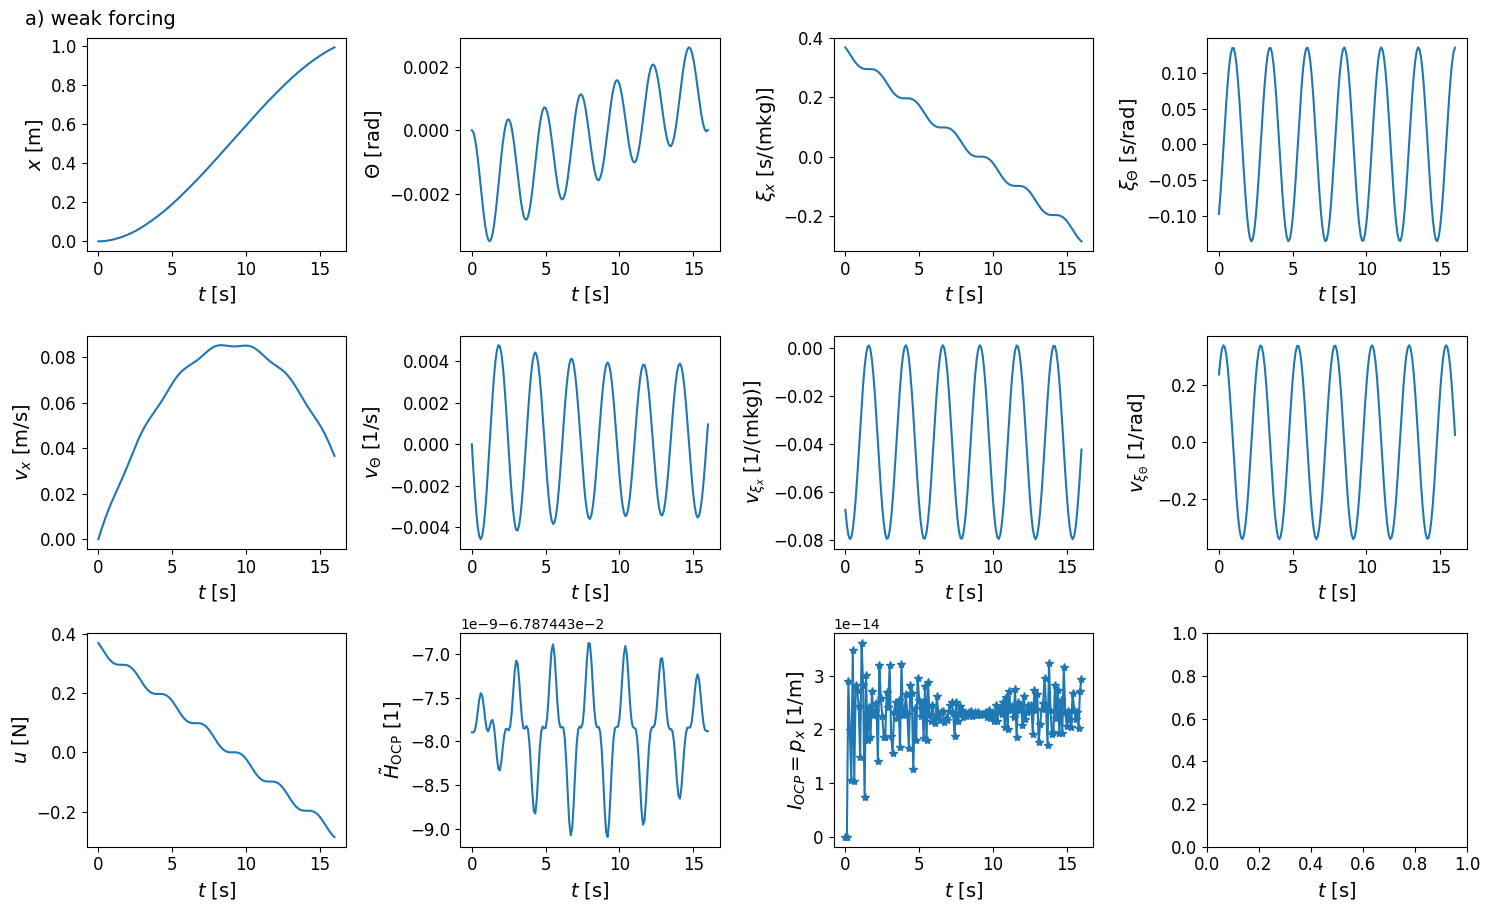

In [22]:

fig=plt.figure(figsize=(15, 9))
ax1 = plt.subplot(3,4,1)
ax2 = plt.subplot(3,4,2)
ax3 = plt.subplot(3,4,3)
ax4 = plt.subplot(3,4,4)
ax5 = plt.subplot(3,4,5)
ax6 = plt.subplot(3,4,6)
ax7 = plt.subplot(3,4,7)
ax8 = plt.subplot(3,4,8)
ax9 = plt.subplot(3,4,9)
ax10 = plt.subplot(3,4,10)
ax11 = plt.subplot(3,4,11)
ax12 = plt.subplot(3,4,12)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
h_choice = 0.1
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"

loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)


def plot_all_fig3(dict_data,style,label,axs):

    axs[0].plot(dict_data["times"],dict_data["y_d"][0],style,label=label)
    axs[4].plot(dict_data["times"],dict_data["v_y_d"][0][0],style,label=label)

    axs[8].plot(dict_data["times"],dict_data["u_d"],style,label=label)

    axs[1].plot(dict_data["times"],dict_data["y_d"][1],style,label=label)
    axs[5].plot(dict_data["times"],dict_data["v_y_d"][0][1],style,label=label)
    axs[9].plot(dict_data["times"],dict_data["H_evo"],style,label=label)

    axs[2].plot(dict_data["times"],dict_data["y_d"][2],style,label=label)
    axs[6].plot(dict_data["times"],dict_data["v_y_d"][0][2],style,label=label)
    axs[10].plot(dict_data["times"],dict_data["p_y_d"][0][0]-dict_data["p_y_d"][0][0][0],style+'*',label=label)
    
    # axs[10].plot(dict_data["times"],dict_data["p_y_d"][0][2],style,label=label)

    axs[3].plot(dict_data["times"],dict_data["y_d"][3],style,label=label)
    axs[7].plot(dict_data["times"],dict_data["v_y_d"][0][3],style,label=label)
    # axs[11].plot(dict_data["times"],dict_data["p_y_d"][0][3],style,label=label)



style_1= '-'
labelfont = 14
tickfont = 12
label_1 = "reference" #str(loaded_dict_fig1_u["parameters"]["N"])


plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs)

# alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
# h_choice = 0.2
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
# style_2 = '--'
# loaded_dict_fig1_u = data_dict[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)

# h_choice = str(0.4)
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
# style_2 = ':'
# loaded_dict_fig1_u = data_dict[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)


# h_choice = str(0.64)
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
# style_2 = '-.'
# loaded_dict_fig1_u = data_dict[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)



axs[0].set_ylabel(r'$x$ [m]',fontsize=labelfont)
axs[4].set_ylabel(r'$v_x$ [m/s]',fontsize=labelfont)
axs[10].set_ylabel(r'$I_{OCP}=p_x$ [1/m]',fontsize=labelfont)
axs[8].set_ylabel(r'$u$ [N]',fontsize=labelfont)

axs[1].set_ylabel(r'$\Theta$ [rad]',fontsize=labelfont)
axs[5].set_ylabel(r'$v_\Theta$ [1/s]',fontsize=labelfont)
axs[9].set_ylabel(r'$\tilde{H}_\text{OCP}$ [1]',fontsize=labelfont)

axs[2].set_ylabel(r'$\xi_x$ [s/(mkg)]',fontsize=labelfont)
axs[6].set_ylabel(r'$v_{\xi_x}$ [1/(mkg)]',fontsize=labelfont)
# axs[10].set_ylabel(r'$p_\Theta$ [??kg/s]',fontsize=labelfont)

axs[3].set_ylabel(r'$\xi_\Theta$ [s/rad]',fontsize=labelfont)
axs[7].set_ylabel(r'$v_{\xi_\Theta}$ [1/rad]',fontsize=labelfont)
# axs[11].set_ylabel(r'$p_\Theta$ [??kg/s]',fontsize=labelfont)




fig.text(0.02,0.99,f"a) weak forcing",fontsize=labelfont)
# fig.text(0.04,0.97,f"weak forcing",fontsize=labelfont)



# axs[0].legend(title="N",fontsize=tickfont)


for tmp in axs:
    tmp.tick_params(labelsize=tickfont)
    tmp.set_xlabel(r'$t$ [s]',fontsize=labelfont)
    

plt.tight_layout()

# Old figure idea

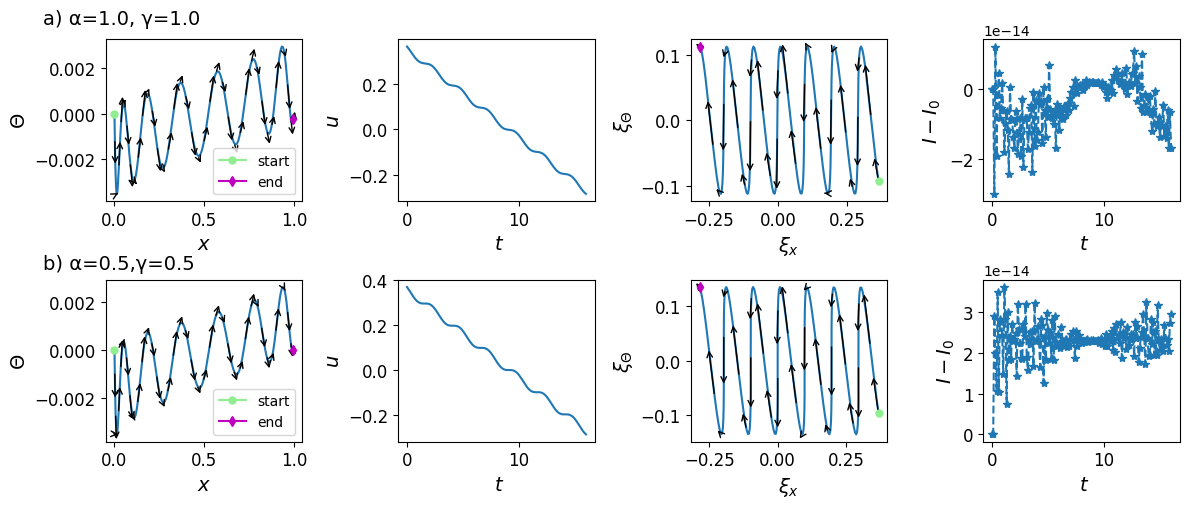

In [166]:
## Fig 1 - Example solution plots
alpha_choice,beta_choice,gamma_choice = 1.0,1.0,1.0
h_choice = 0.1
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
file_name_no_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"

h_choice = 0.1
alpha_choice2,beta_choice2,gamma_choice2 = 0.5,0.5,0.5
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"
file_name_no_u_2 =  "new_u_dep_data_a="+str(alpha_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl" 


# print("temporary just copy the control indep formulation from the controldep, need to still implement that")
loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
# loaded_dict_fig1_no_u = data_dict[file_name_no_u][0]
# no_u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_no_u)
# properly_calc_u_d = [get_u_from_lambda(x,y,loaded_dict_fig1_u["parameters"]) for (x,y) in zip(loaded_dict_fig1_u["lam_d"],loaded_dict_fig1_u['q_d'])]
# velocity_vals = loaded_dict_fig1_u
labelfont = 14
tickfont = 12

fig, axs = plt.subplots(2, 4,figsize=(12,5))

axs[0,0].plot(u_dep_fig1_data["y_d"][0],u_dep_fig1_data["y_d"][1],'-')  
axs[0,0].ticklabel_format(style='sci')
axs[0,0].tick_params(labelsize=tickfont)
axs[0,0].set_xlabel(r'$x$',fontsize=labelfont)
axs[0,0].set_ylabel(r'$\Theta$',fontsize=labelfont)
axs[0,1].plot(u_dep_fig1_data["times"], u_dep_fig1_data["u_d"],'-')
axs[0,1].ticklabel_format(style='sci')
axs[0,0].tick_params(labelsize=tickfont)
axs[0,2].plot(u_dep_fig1_data["y_d"][2],u_dep_fig1_data["y_d"][3],'-',label=r'$\tilde{\mathcal{J}}~{}_d^\mathcal{E}$')   
axs[0,3].plot(u_dep_fig1_data["times"],u_dep_fig1_data["conserved_I"]- u_dep_fig1_data["conserved_I"][0] ,'--*')

# axs[0,0].plot(no_u_dep_fig1_data["y_d"][0],u_dep_fig1_data["y_d"][1],'--')  

# axs[0,1].plot(no_u_dep_fig1_data["times"], no_u_dep_fig1_data["u_d"],'--')

axs[0,1].set_xlabel(" $t$",fontsize=labelfont)
axs[0,1].set_ylabel("$u$",fontsize=labelfont)
# axs[0,2].plot(no_u_dep_fig1_data["y_d"][2],no_u_dep_fig1_data["y_d"][3],'-',label=r"$\tilde{\mathcal{J}}_d$")     
axs[0,2].set_xlabel(r'$\xi_x$',fontsize=labelfont)
axs[0,2].set_ylabel(r'$\xi_\Theta$',fontsize=labelfont)
# axs[0,2].legend(fontsize=labelfont)
# axs[0,3].plot(no_u_dep_fig1_data[0],no_u_dep_fig1_data[4]-no_u_dep_fig1_data[4][0],'-')
# axs[0,3].plot(no_u_dep_fig1_data["times"],no_u_dep_fig1_data["conserved_I"]- no_u_dep_fig1_data["conserved_I"][0] ,'-')

axs[0,3].set_xlabel(' $t$',fontsize=labelfont)
axs[0,3].set_ylabel('$I-I_0$',fontsize=labelfont)

fig.text(0.04,0.97,f"a) α={alpha_choice}, γ={gamma_choice}",fontsize=labelfont)

loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_data_from_dict(loaded_dict_fig1_u_2)
loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
no_u_dep_fig1_data_2 = get_fig_data_from_dict(loaded_dict_fig1_no_u_2)

axs[1,0].plot(u_dep_fig1_data_2["y_d"][0],u_dep_fig1_data_2["y_d"][1],'-')  
# axs[1,0].plot(no_u_dep_fig1_data_2["y_d"][0],u_dep_fig1_data_2["y_d"][1],'--')  
axs[1,0].ticklabel_format(style='sci')
axs[1,0].tick_params(labelsize=tickfont)
axs[1,0].set_xlabel(r'$x$',fontsize=labelfont)
axs[1,0].set_ylabel(r'$\Theta$',fontsize=labelfont)
axs[1,1].plot(u_dep_fig1_data_2["times"], u_dep_fig1_data_2["u_d"],'-')
axs[1,1].ticklabel_format(style='sci')
axs[1,0].tick_params(labelsize=tickfont)
axs[1,2].plot(u_dep_fig1_data_2["y_d"][2],u_dep_fig1_data_2["y_d"][3],'-',label=r'$\tilde{\mathcal{J}}~{}_d^\mathcal{E}$')   
axs[1,3].plot(u_dep_fig1_data_2["times"],u_dep_fig1_data_2["conserved_I"]- u_dep_fig1_data_2["conserved_I"][0] ,'--*')
# # axs[0,0].plot(no_u_dep_fig1_data[1][0],no_u_dep_fig1_data[1][1],'--')    
# # axs[0,1].plot(no_u_dep_fig1_data[0], [x[0] for x in no_u_dep_fig1_data[3]],'--')
# axs[1,1].plot(no_u_dep_fig1_data_2["times"], no_u_dep_fig1_data_2["u_d"],'--')

axs[1,1].set_xlabel(" $t$",fontsize=labelfont)
axs[1,1].set_ylabel("$u$",fontsize=labelfont)
# axs[1,2].plot(no_u_dep_fig1_data_2["y_d"][2],no_u_dep_fig1_data_2["y_d"][3],'-',label=r"$\tilde{\mathcal{J}}_d$")     
axs[1,2].set_xlabel(r'$\xi_x$',fontsize=labelfont)
axs[1,2].set_ylabel(r'$\xi_\Theta$',fontsize=labelfont)
# axs[1,2].legend(fontsize=labelfont)
# axs[0,3].plot(no_u_dep_fig1_data[0],no_u_dep_fig1_data[4]-no_u_dep_fig1_data[4][0],'-')
# axs[1,3].plot(no_u_dep_fig1_data_2["times"],no_u_dep_fig1_data_2["conserved_I"]- no_u_dep_fig1_data_2["conserved_I"][0] ,'-')

axs[1,3].set_xlabel(' $t$',fontsize=labelfont)
axs[1,3].set_ylabel('$I-I_0$',fontsize=labelfont)
fig.tight_layout()




# loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
# u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_2,True,True)
# loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
# no_u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_2,False,True)

# properly_calc_u_d_2 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_2["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_2["lam_d"],loaded_dict_fig1_u_2['q_d'])]

# axs[1,0].plot(u_dep_fig1_data_2[1][0],u_dep_fig1_data_2[1][1],'-')    
# axs[1,0].ticklabel_format(style='sci')
# axs[1,0].set_xlabel(r'$x$',fontsize=labelfont)
# axs[1,0].set_ylabel(r'$y$',fontsize=labelfont)
# axs[1,1].plot(u_dep_fig1_data_2[0], properly_calc_u_d_2,'-')
# axs[1,1].ticklabel_format(style='sci')
# axs[1,2].plot(np.array(u_dep_fig1_data_2[2][0]),np.array(u_dep_fig1_data_2[2][1]),'-',label=r'$\tilde{\mathcal{J}}~{}_d^\mathcal{E}$')    
# axs[1,3].plot(u_dep_fig1_data_2[0],u_dep_fig1_data_2[5] - u_dep_fig1_data_2[5][0] ,'--*')
# axs[1,0].plot(no_u_dep_fig1_data_2[1][0],no_u_dep_fig1_data_2[1][1],'--')    
# axs[1,1].plot(no_u_dep_fig1_data_2[0], [x[0] for x in no_u_dep_fig1_data_2[3]],'--')
# axs[1,1].set_xlabel(" $t$",fontsize=labelfont)
# axs[1,1].set_ylabel("$u$",fontsize=labelfont)
# axs[1,2].plot(np.array(no_u_dep_fig1_data_2[2][0]),np.array(no_u_dep_fig1_data_2[2][1]),'--',label=r"$\tilde{\mathcal{J}}_d$")    
# axs[1,2].set_xlabel('$\xi_x$',fontsize=labelfont)
# axs[1,2].set_ylabel('$\xi_y$',fontsize=labelfont)
# axs[1,2].legend(fontsize=labelfont)
# axs[1,3].plot(no_u_dep_fig1_data_2[0],no_u_dep_fig1_data_2[4]-no_u_dep_fig1_data_2[4][0],'-')
# axs[1,3].set_xlabel(' $t$',fontsize=labelfont)
# axs[1,3].set_ylabel('$I-I_0$',fontsize=labelfont)
# fig.tight_layout()
fig.text(0.04,0.48,f"b) α={alpha_choice2},γ={gamma_choice2}",fontsize=labelfont)
axs[0,0].tick_params(labelsize=tickfont)
axs[0,1].tick_params(labelsize=tickfont)
axs[0,2].tick_params(labelsize=tickfont)
axs[0,3].tick_params(labelsize=tickfont)
axs[1,0].tick_params(labelsize=tickfont)
axs[1,1].tick_params(labelsize=tickfont)
axs[1,2].tick_params(labelsize=tickfont)
axs[1,3].tick_params(labelsize=tickfont)

plot_traj_v = u_dep_fig1_data["v_y_d"]
plot_traj_v2 = u_dep_fig1_data_2["v_y_d"]

arrowwidth = 0.0002
plot_curve_with_velocity_arrows(axs[0,0],u_dep_fig1_data["y_d"][:2],0.3*u_dep_fig1_data["v_y_d"][0][:2],4,{'head_width':0.003,'width':arrowwidth})  
plot_curve_with_velocity_arrows(axs[1,0],u_dep_fig1_data_2["y_d"][:2],0.3*u_dep_fig1_data_2["v_y_d"][0][:2],4,{'head_width':0.003,'width':arrowwidth})  

plot_curve_with_velocity_arrows(axs[0,2],u_dep_fig1_data["y_d"][2:],0.3*u_dep_fig1_data["v_y_d"][0][2:],4,{'head_width':0.003,'width':arrowwidth})  
plot_curve_with_velocity_arrows(axs[1,2],u_dep_fig1_data_2["y_d"][2:],0.3*u_dep_fig1_data_2["v_y_d"][0][2:],4,{'head_width':0.003,'width':arrowwidth})  

# axs[0,0].set_xlim([0,0.2])
# plot_curve_with_velocity_arrows(axs[0,2],u_dep_fig1_data[2],plot_traj_v[1],20,{'head_width':0.0005,'width':0.000031,'zorder':10})  
# plot_curve_with_velocity_arrows(axs[1,0],u_dep_fig1_data_2[1],plot_traj_v2[0],15,{'head_width':0.3,'width':0.031})  
# plot_curve_with_velocity_arrows(axs[1,2],u_dep_fig1_data_2[2],plot_traj_v2[1],20,{'head_width':0.0005,'width':0.000031,'zorder':10})  

boundarymarkersize=5
axs[0,0].plot([u_dep_fig1_data["y_d"][0][0]],[u_dep_fig1_data["y_d"][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[0,0].plot([u_dep_fig1_data["y_d"][0][-1]],[u_dep_fig1_data["y_d"][1][-1]],marker='d', color='m',markersize=boundarymarkersize,label='end',zorder=11)
axs[0,0].legend()

axs[0,2].plot([u_dep_fig1_data["y_d"][2][0]],[u_dep_fig1_data["y_d"][3][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[0,2].plot([u_dep_fig1_data["y_d"][2][-1]],[u_dep_fig1_data["y_d"][3][-1]],marker='d', color='m',markersize=boundarymarkersize,label='end',zorder=11)

axs[1,0].plot([u_dep_fig1_data_2["y_d"][0][0]],[u_dep_fig1_data_2["y_d"][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[1,0].plot([u_dep_fig1_data_2["y_d"][0][-1]],[u_dep_fig1_data_2["y_d"][1][-1]],marker='d', color='m',markersize=boundarymarkersize,label='end',zorder=11)
axs[1,0].legend()

axs[1,2].plot([u_dep_fig1_data_2["y_d"][2][0]],[u_dep_fig1_data_2["y_d"][3][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[1,2].plot([u_dep_fig1_data_2["y_d"][2][-1]],[u_dep_fig1_data_2["y_d"][3][-1]],marker='d', color='m',markersize=boundarymarkersize,label='end',zorder=11)

plt.savefig('figures/Examples_fig_1.pdf')


# Figure 2: Control comparison and t-evolution

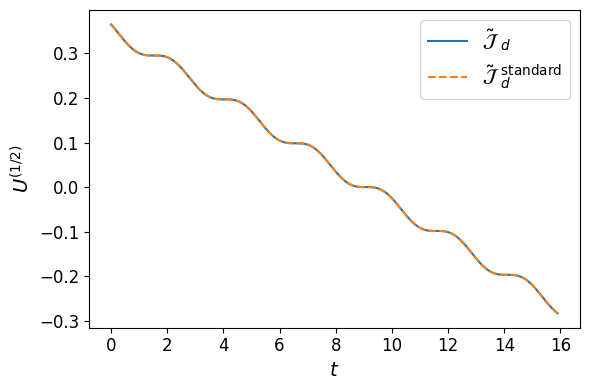

In [146]:
h_choice = 0.1
alpha_choice2,beta_choice2,gamma_choice2 = 0.5,0.5,0.5
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"
# file_name_no_u_2 =  "no_u_dep_data_a="+str(alpha_choice2)+"b="+str(beta_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"


loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_data_from_dict(loaded_dict_fig1_u_2)


fig, axs = plt.subplots(1, 1,figsize=(6,4))
axs.plot(u_dep_fig1_data_2["times"][:-1],(u_dep_fig1_data_2["u_d"][1:]+u_dep_fig1_data_2["u_d"][:-1])/2,label=r"$\tilde{\mathcal{J}} ~{}_d$")#,label=r"$\tilde{\mathcal{J}} ~{}^\text{standard}_d$")
axs.plot(u_dep_fig1_data_2["times"][:-1],u_dep_fig1_data_2["standard_U_a"].flatten(),'--',label=r"$\tilde{\mathcal{J}} ~{}^\text{standard}_d$")
# comparisondata_U = np.array([x[0] for x in u_dep_fig1_data_2[3][:-1]])
# axs.plot(u_dep_fig1_data_2[0][:-1], comparisondata_U.flatten(),'--',label=r"$\tilde{\mathcal{J}} ~{}_d^\mathcal{E}$")
axs.set_xlabel('$t$',fontsize=labelfont)
axs.set_ylabel('$U^{(1/2)}$',fontsize=labelfont)
axs.legend(fontsize=labelfont)
axs.tick_params(labelsize=tickfont)

fig.tight_layout()
plt.savefig('figures/fig2_control_standard_comp.pdf')

# Fig. 3 convergence analysis

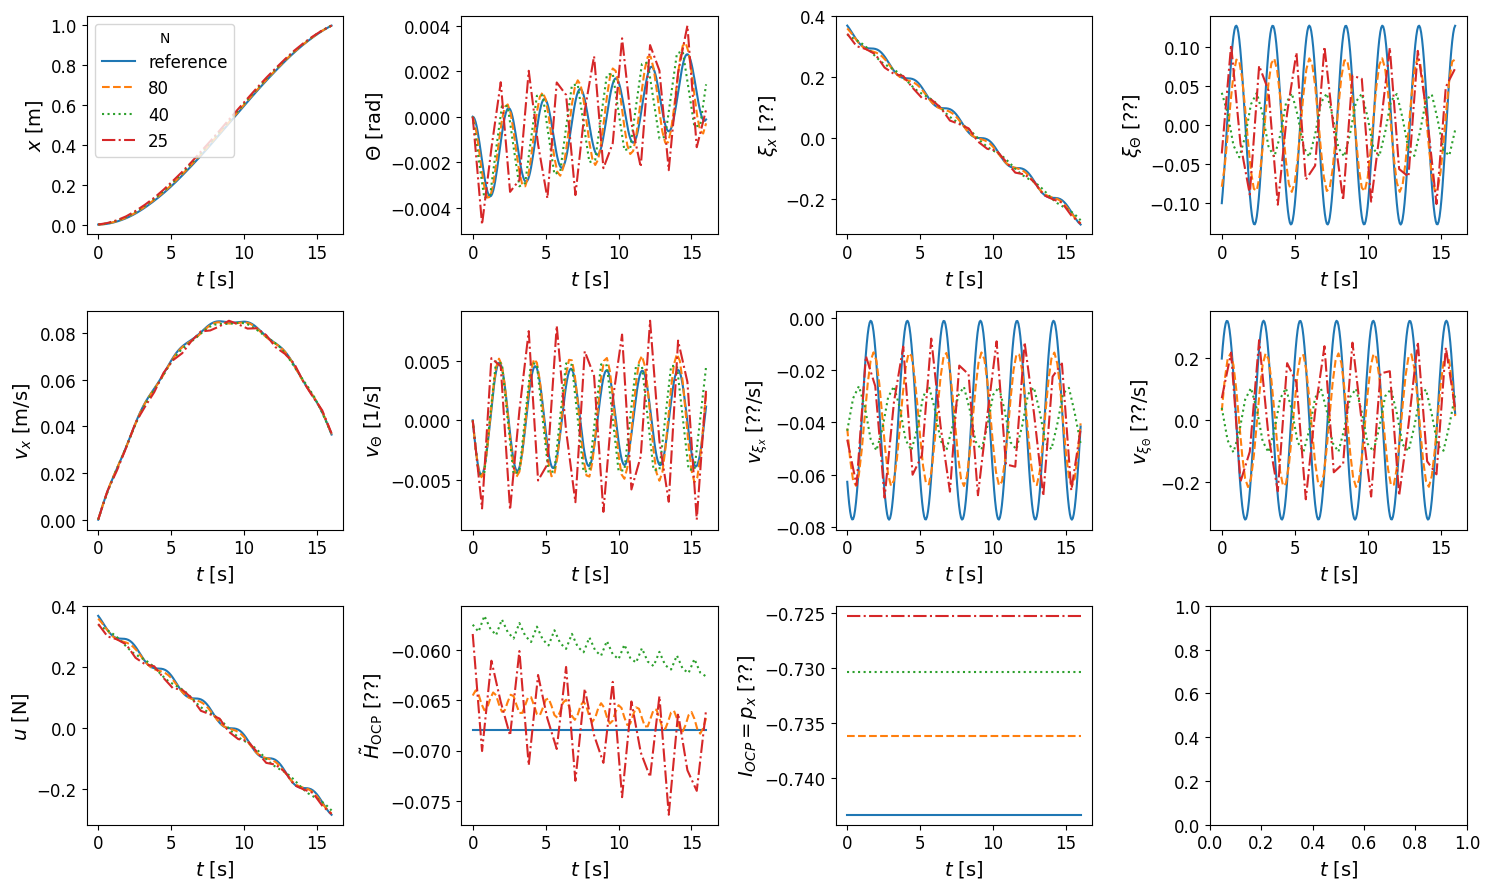

In [147]:

fig=plt.figure(figsize=(15, 9))
ax1 = plt.subplot(3,4,1)
ax2 = plt.subplot(3,4,2)
ax3 = plt.subplot(3,4,3)
ax4 = plt.subplot(3,4,4)
ax5 = plt.subplot(3,4,5)
ax6 = plt.subplot(3,4,6)
ax7 = plt.subplot(3,4,7)
ax8 = plt.subplot(3,4,8)
ax9 = plt.subplot(3,4,9)
ax10 = plt.subplot(3,4,10)
ax11 = plt.subplot(3,4,11)
ax12 = plt.subplot(3,4,12)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
h_choice = 0.0666
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"

loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)


def plot_all_fig3(dict_data,style,label,axs):

    axs[0].plot(dict_data["times"],dict_data["y_d"][0],style,label=label)
    axs[4].plot(dict_data["times"],dict_data["v_y_d"][0][0],style,label=label)

    axs[8].plot(dict_data["times"],dict_data["u_d"],style,label=label)

    axs[1].plot(dict_data["times"],dict_data["y_d"][1],style,label=label)
    axs[5].plot(dict_data["times"],dict_data["v_y_d"][0][1],style,label=label)
    axs[9].plot(dict_data["times"],dict_data["H_evo"],style,label=label)

    axs[2].plot(dict_data["times"],dict_data["y_d"][2],style,label=label)
    axs[6].plot(dict_data["times"],dict_data["v_y_d"][0][2],style,label=label)
    axs[10].plot(dict_data["times"],dict_data["p_y_d"][0][0],style,label=label)
    
    # axs[10].plot(dict_data["times"],dict_data["p_y_d"][0][2],style,label=label)

    axs[3].plot(dict_data["times"],dict_data["y_d"][3],style,label=label)
    axs[7].plot(dict_data["times"],dict_data["v_y_d"][0][3],style,label=label)
    # axs[11].plot(dict_data["times"],dict_data["p_y_d"][0][3],style,label=label)



style_1= '-'
labelfont = 14
tickfont = 12
label_1 = "reference" #str(loaded_dict_fig1_u["parameters"]["N"])


plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs)

alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
h_choice = 0.2
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
style_2 = '--'
loaded_dict_fig1_u = data_dict[file_name_u][0]
label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)

h_choice = str(0.4)
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
style_2 = ':'
loaded_dict_fig1_u = data_dict[file_name_u][0]
label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)


h_choice = str(0.64)
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
style_2 = '-.'
loaded_dict_fig1_u = data_dict[file_name_u][0]
label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u)
plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs)



axs[0].set_ylabel(r'$x$ [m]',fontsize=labelfont)
axs[4].set_ylabel(r'$v_x$ [m/s]',fontsize=labelfont)
axs[10].set_ylabel(r'$I_{OCP}=p_x$ [??]',fontsize=labelfont)
axs[8].set_ylabel(r'$u$ [N]',fontsize=labelfont)

axs[1].set_ylabel(r'$\Theta$ [rad]',fontsize=labelfont)
axs[5].set_ylabel(r'$v_\Theta$ [1/s]',fontsize=labelfont)
axs[9].set_ylabel(r'$\tilde{H}_\text{OCP}$ [??]',fontsize=labelfont)

axs[2].set_ylabel(r'$\xi_x$ [??]',fontsize=labelfont)
axs[6].set_ylabel(r'$v_{\xi_x}$ [??/s]',fontsize=labelfont)
# axs[10].set_ylabel(r'$p_\Theta$ [??kg/s]',fontsize=labelfont)

axs[3].set_ylabel(r'$\xi_\Theta$ [??]',fontsize=labelfont)
axs[7].set_ylabel(r'$v_{\xi_\Theta}$ [??/s]',fontsize=labelfont)
# axs[11].set_ylabel(r'$p_\Theta$ [??kg/s]',fontsize=labelfont)







axs[0].legend(title="N",fontsize=tickfont)


for tmp in axs:
    tmp.tick_params(labelsize=tickfont)
    tmp.set_xlabel(r'$t$ [s]',fontsize=labelfont)
    

plt.tight_layout()
plt.savefig('figures/fig_3_all.pdf')

In [1]:
import  numpy as np

In [3]:
1.5*360/(2*np.pi)

85.94366926962348

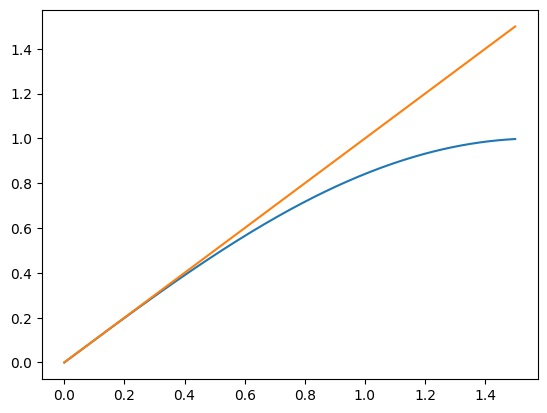

In [173]:
tvals = np.linspace(0,1.5,200)
plt.plot(tvals,np.sin(tvals))
plt.plot(tvals,tvals)